In [1]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np

from tqdm import tqdm

from zeste_vision.data_tools.loader import get_test_video_frames
from zeste_vision.analysis.occlusion import test

occlusion_analysis::test: loading frames
occlusion_analysis::test: frames loaded


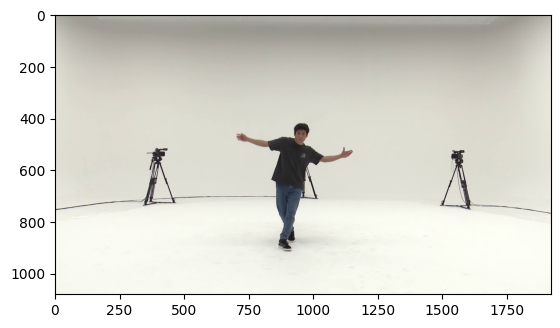

I0000 00:00:1730167175.421836   15894 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1730167175.490157   15947 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 470.256.02), renderer: NVIDIA GeForce GTX 1080/PCIe/SSE2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1730167175.566631   15940 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730167175.597952   15939 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730167175.621584   15939 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
/home/lamsey/anaconda3/envs/zeste_vision/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: Use

occlusion_analysis::test: pose estimation complete


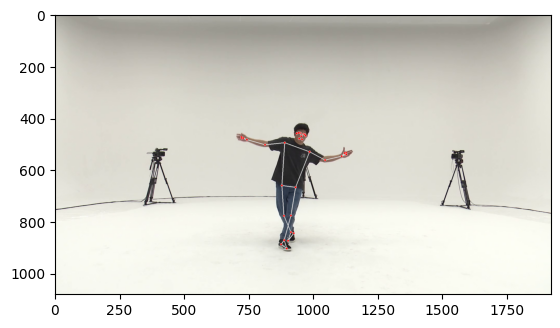

In [2]:
test(use_cv=False)

In [3]:
from zeste_vision.data_tools.loader import get_test_video_frame
DRAWING = mp.solutions.drawing_utils
POSE_CONNECTIONS = mp.solutions.pose.POSE_CONNECTIONS

I0000 00:00:1730167176.447082   15894 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1730167176.523341   15967 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 470.256.02), renderer: NVIDIA GeForce GTX 1080/PCIe/SSE2
W0000 00:00:1730167176.621735   15963 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730167176.655543   15966 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


occlusion_analysis::test: pose estimation complete


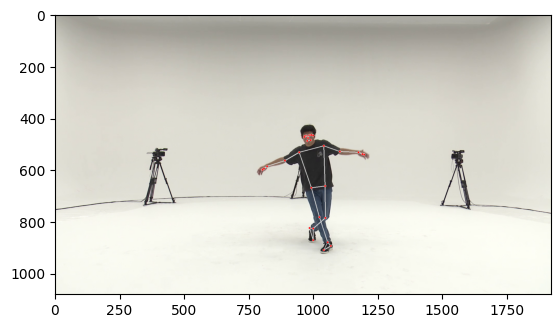

In [4]:
video_path = "/home/lamsey/hrl/zeste_vision/data/aist_dance/"
video_file = video_path + "gBR_sBM_c01_d04_mBR0_ch01.mp4"
test_frame = get_test_video_frame(video_file, frame_i=100)

# instantiate pose estimator
MEDIAPIPE_OPTIONS = {
    "static_image_mode": False,
    "model_complexity": 1,
    "smooth_landmarks": True,
    "enable_segmentation": True,
    "smooth_segmentation": True,
    "min_detection_confidence": 0.5,
    "min_tracking_confidence": 0.5
}

pose = mp.solutions.pose.Pose(**MEDIAPIPE_OPTIONS)

# run pose estimator on test frame
results = pose.process(test_frame)
print("occlusion_analysis::test: pose estimation complete")

render_image = test_frame.copy()
DRAWING.draw_landmarks(render_image, results.pose_landmarks, POSE_CONNECTIONS)

rgb_frame = cv2.cvtColor(render_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_frame)
plt.show()

(783, 428, 430, 495)


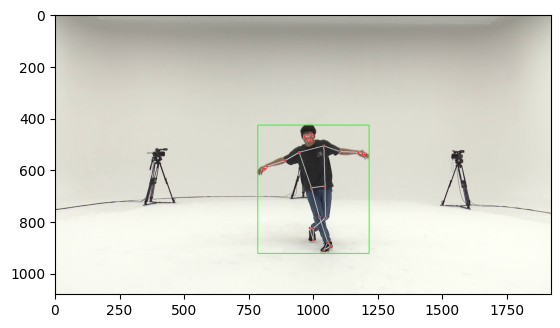

In [5]:
# results
# a = results.pose_landmarks.landmark
# print(a)
mask = results.segmentation_mask.astype(np.uint8)
plt.imshow(mask)

# get bounding box
bbox = cv2.boundingRect(mask)
print(bbox)

# draw bounding box
cv2.rectangle(render_image, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 2)

rgb_frame = cv2.cvtColor(render_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_frame)

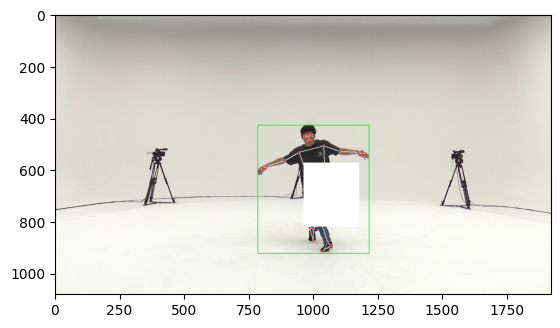

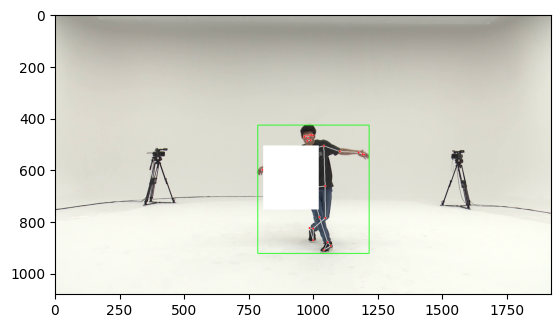

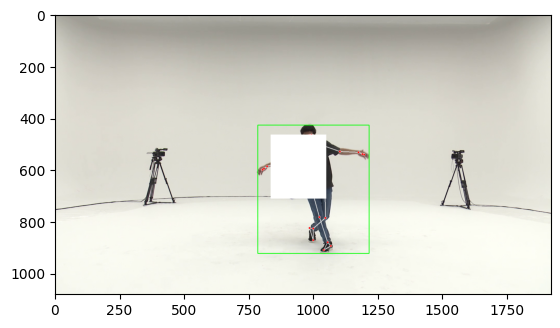

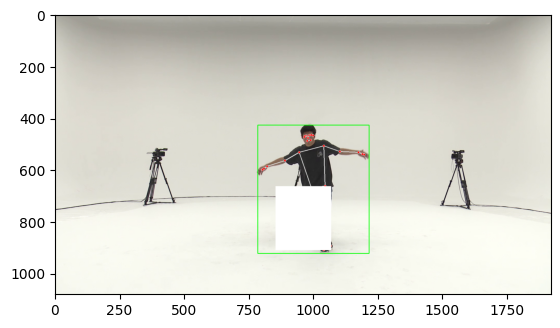

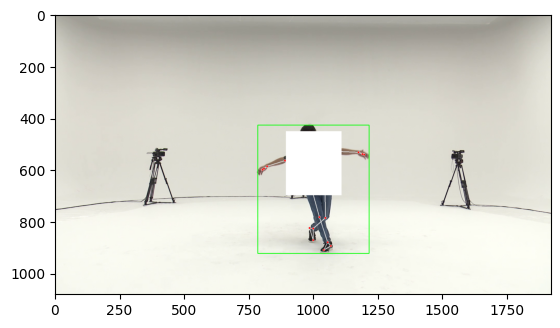

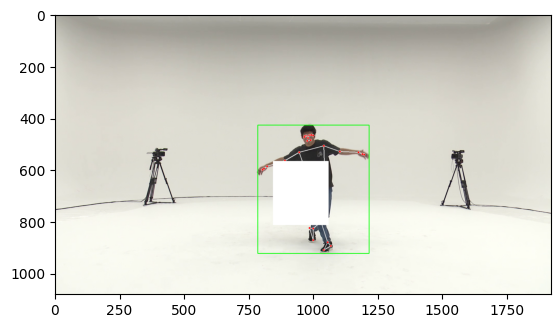

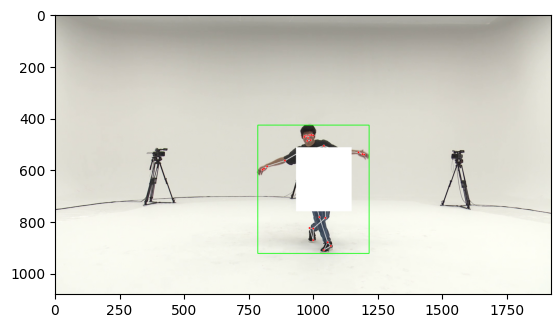

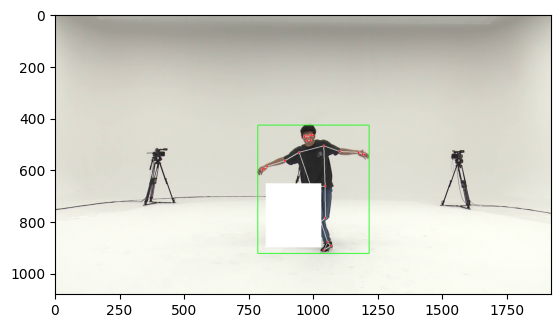

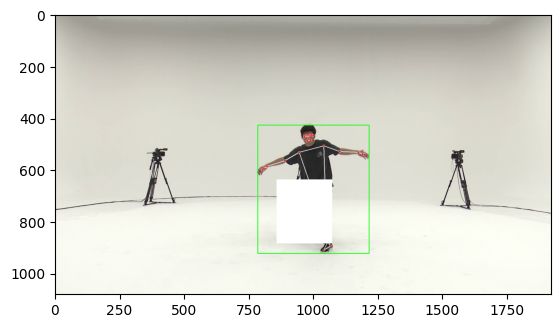

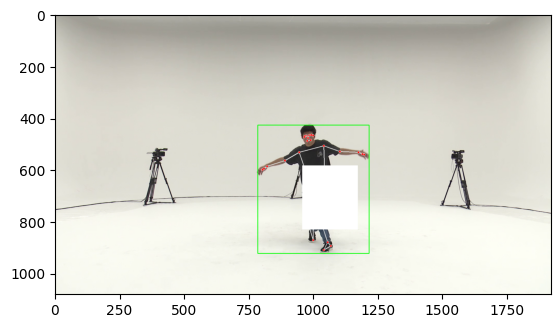

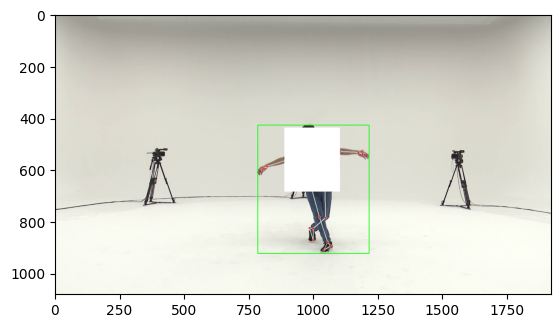

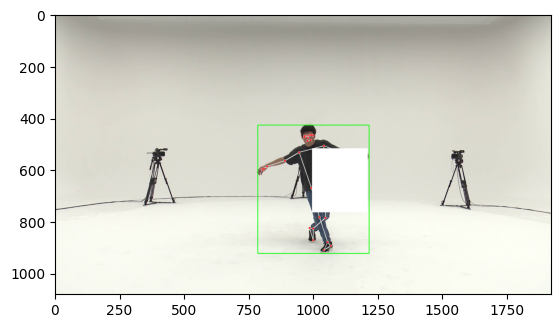

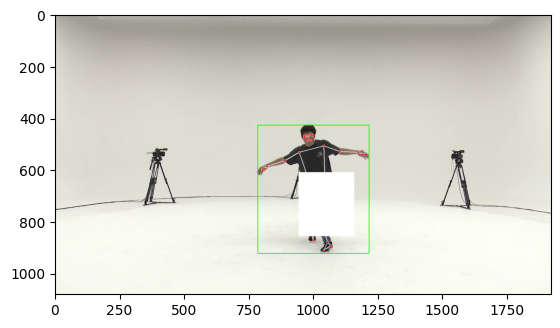

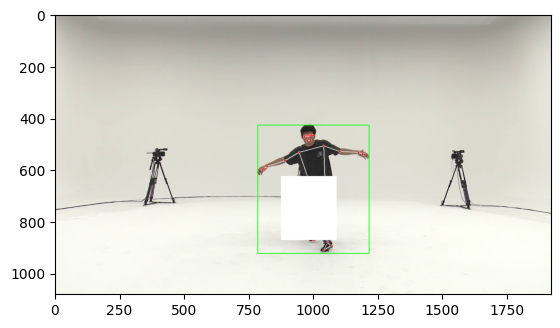

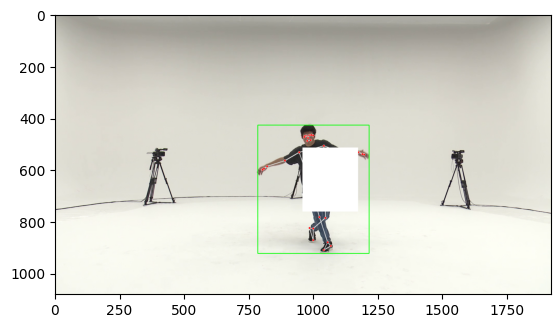

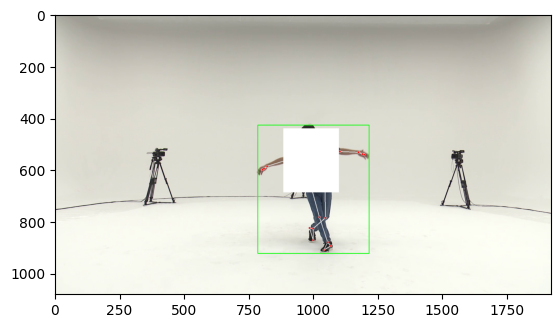

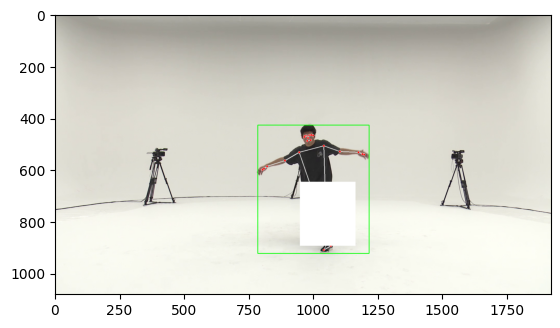

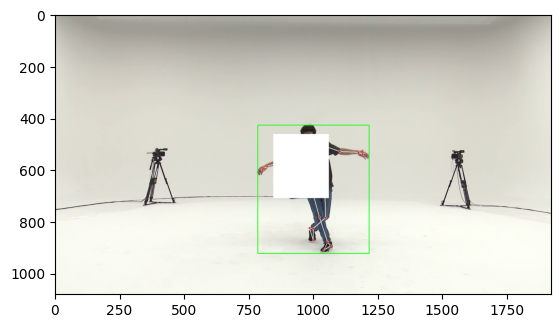

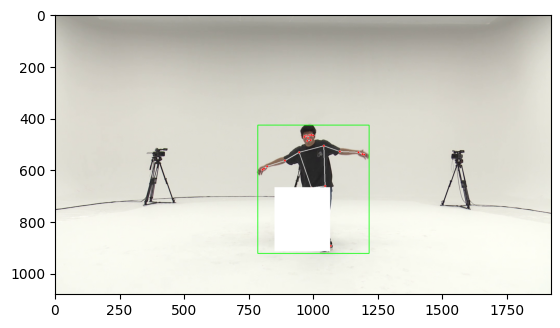

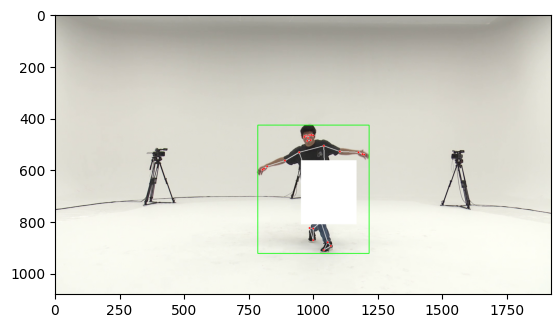

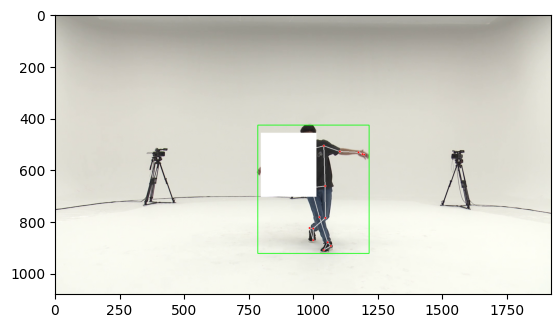

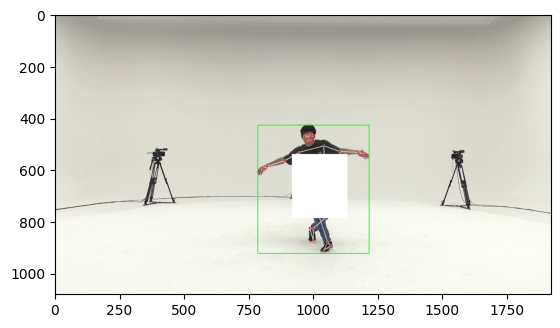

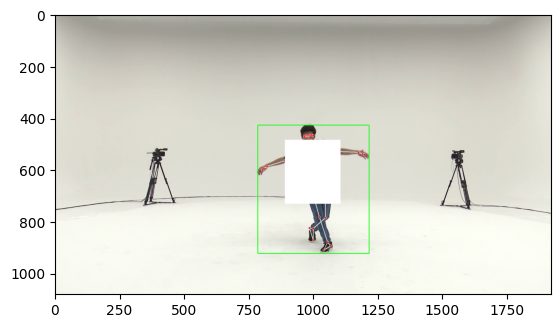

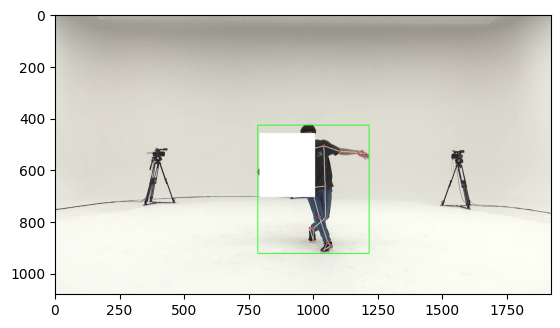

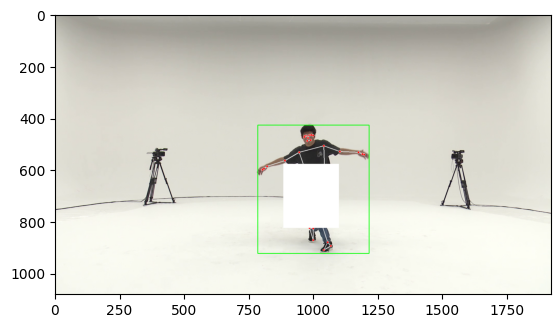

In [7]:
from zeste_vision.analysis.pose_tools import compute_bounding_box, add_occlusion
from time import sleep

bbox = compute_bounding_box(results)

for _ in range(25):
    new_img = add_occlusion(render_image, bbox, percent=0.5)
    rgb_frame = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_frame)
    plt.show()
